In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
import statsmodels.tsa.stattools as ts

## read example train features

In [2]:
downsample_pts = 1

In [3]:
def my_load(subj_ids:list, series_ids:list):
    features_all = []
    targets_all = []
    for i1 in subj_ids:
        for i2 in series_ids:
            for i3, fn in [
                ('features', 'data/raw/train/subj%i_series%i_data.csv'%(i1, i2)),
                ('targets', 'data/raw/train/subj%i_series%i_events.csv'%(i1, i2)),
            ]:
                print('status:', i1, i2, i3)
                xxx_i = pd.read_csv(fn)
                xxx_i['subj_id'] = i1
                xxx_i['series_id'] = i2
                xxx_i = xxx_i.set_index(['subj_id', 'series_id', 'id']).astype('int16')
                xxx_i = xxx_i[::downsample_pts] # downsample
                if i3=='features':
                    features_all.append(xxx_i)
                else:
                    targets_all.append(xxx_i)
            
    features_all = pd.concat(features_all, axis=0)
    targets_all = pd.concat(targets_all, axis=0)
    return features_all, targets_all

In [4]:
train_features, train_targets = my_load(subj_ids = [1], series_ids = [x+1 for x in range(8)])
train_features.shape, train_targets.shape

status: 1 1 features
status: 1 1 targets
status: 1 2 features
status: 1 2 targets
status: 1 3 features
status: 1 3 targets
status: 1 4 features
status: 1 4 targets
status: 1 5 features
status: 1 5 targets
status: 1 6 features
status: 1 6 targets
status: 1 7 features
status: 1 7 targets
status: 1 8 features
status: 1 8 targets


((1422392, 32), (1422392, 6))

In [5]:
def adf2human(result):
    """
    utility function: ADF result for humans
    https://stats.stackexchange.com/questions/73921/how-to-interpret-the-results-of-adf-test-using-sas-arima#74508
    """
    return 'stationary' if result[1] <= 0.05 else ('could be non-stationary' if result[0] > -2.5 else 'stationary')

adf2human([10, .01]), adf2human([10, .08]), adf2human([-10, .01]), adf2human([-10, .08])

('stationary', 'non-stationary', 'stationary', 'stationary')

## ADF test on first 1k pts

result is 'not stationary'

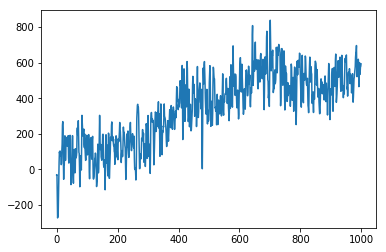

In [6]:
k = train_features.columns[0]
x = train_features[k].head(n=1000)
# x -= x.reset_index().index*(600)/1000
x.reset_index()[k].plot()
plt.show()

In [7]:
result = ts.adfuller(x, maxlag=5)
k, result, adf2human(result)

('Fp1',
 (-4.165590232666707,
  0.0007530657499519448,
  4,
  995,
  {'1%': -3.4369391965679257,
   '10%': -2.5683189679553546,
   '5%': -2.86444914142694},
  10929.095744617922),
 'stationary')

In [8]:
result = ts.adfuller(x)#, maxlag=5)
k, result, adf2human(result)

('Fp1',
 (-1.2048153336283156,
  0.6715208542287323,
  20,
  979,
  {'1%': -3.4370471695043037,
   '10%': -2.5683443301882956,
   '5%': -2.8644967585264784},
  10660.24053959139),
 'non-stationary')

## ADF test on first 10k pts

result is 'stationary'

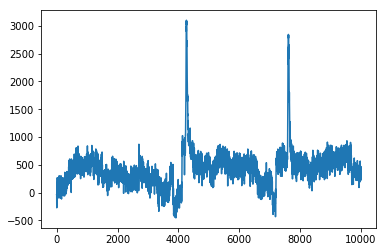

In [9]:
k = train_features.columns[0]
x = train_features[k].head(n=10000)
# x -= x.reset_index().index*(600)/1000
x.reset_index()[k].plot()
plt.show()

In [10]:
result = ts.adfuller(x, maxlag=5)
k, result, adf2human(result)

('Fp1',
 (-7.974492481488879,
  2.725330025099013e-12,
  5,
  9994,
  {'1%': -3.4310044907347454,
   '10%': -2.566923960483154,
   '5%': -2.8618292459530794},
  110409.62249859238),
 'stationary')

In [11]:
result = ts.adfuller(x)#, maxlag=5)
k, result, adf2human(result)

('Fp1',
 (-7.451977113318177,
  5.639314425288558e-11,
  28,
  9971,
  {'1%': -3.431006000830514,
   '10%': -2.566924315687191,
   '5%': -2.8618299132518468},
  109826.35601400436),
 'stationary')

## test on synthetic data

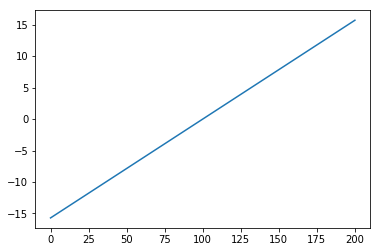

((0.11191106081180316,
  0.9668649712345261,
  0,
  200,
  {'1%': -3.463476079125, '10%': -2.574532225, '5%': -2.876102355},
  -12820.99034145642),
 'non-stationary')

In [12]:
# straight line
x = np.linspace(-5*np.pi, +5*np.pi, 201)
x = pd.Series(x)

x.plot()
plt.show()

result = ts.adfuller(x, maxlag=5)
result, adf2human(result)

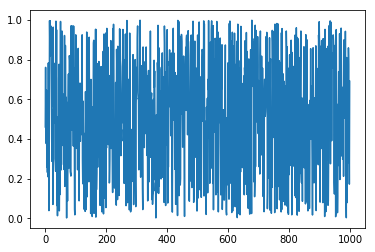

((-32.43692617846402,
  0.0,
  0,
  999,
  {'1%': -3.4369127451400474,
   '10%': -2.568312754566378,
   '5%': -2.864437475834273},
  391.3254338490092),
 'stationary')

In [13]:
x = pd.Series(np.random.uniform(size=1000))
# x += x.shift(1).fillna(value=0) + x.shift(2).fillna(value=0)
x.plot()
plt.show()

result = ts.adfuller(x, maxlag=5)
result, adf2human(result)

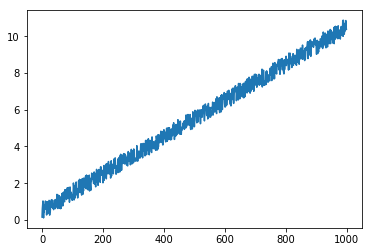

((-0.3735262839325294,
  0.9144259891424013,
  5,
  994,
  {'1%': -3.43694584277544,
   '10%': -2.5683205291305176,
   '5%': -2.8644520725172873},
  458.00274865376696),
 'non-stationary')

In [14]:
x = pd.Series(np.random.uniform(size=1000)) + np.linspace(0, 10, 1000)

x.plot()
plt.show()

result = ts.adfuller(x, maxlag=5)
result, adf2human(result)

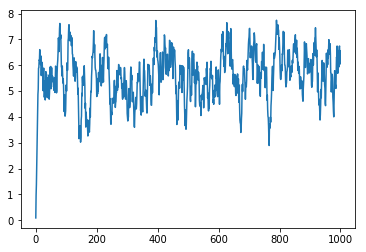

((-4.50544284408962,
  0.00019223457492658163,
  22,
  977,
  {'1%': -3.43706091543889,
   '10%': -2.568347558984588,
   '5%': -2.8645028204932483},
  647.3527793033788),
 'stationary')

In [15]:
x = pd.Series(np.random.uniform(size=1000))

y = x*0
for i in range(10):
    y += x.shift(i+1).fillna(value=0) # + np.linspace(0, 1, 1000)   
x += y

x.plot()
plt.show()

result = ts.adfuller(x)#, maxlag=5)
result, adf2human(result)

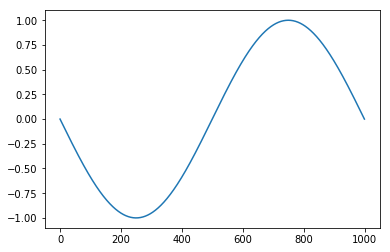

((-31021418561302.68,
  0.0,
  13,
  986,
  {'1%': -3.4369994990319355,
   '10%': -2.5683331327427803,
   '5%': -2.8644757356011743},
  -67888.27387463556),
 'stationary')

In [16]:
# sinusoid
x = np.linspace(-np.pi, np.pi, 1000)
x = pd.Series(np.sin(x))

x.plot()
plt.show()

result = ts.adfuller(x)#, maxlag=5)
result, adf2human(result)

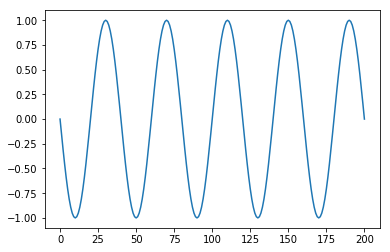

((-173499374812474.22,
  0.0,
  1,
  199,
  {'1%': -3.4636447617687436,
   '10%': -2.57457158581854,
   '5%': -2.8761761179270766},
  -12776.745323304393),
 'stationary')

In [17]:
# sinusoid
x = np.linspace(-5*np.pi, +5*np.pi, 201)
x = pd.Series(np.sin(x))

x.plot()
plt.show()

result = ts.adfuller(x, maxlag=5)
result, adf2human(result)

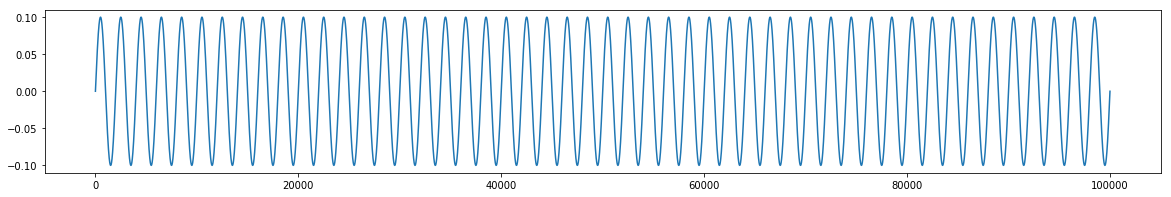

((-2035743674371.6958,
  0.0,
  13,
  99986,
  {'1%': -3.4304154038354513,
   '10%': -2.5667853864350403,
   '5%': -2.8615689074705455},
  -6674639.996242425),
 'stationary')

In [18]:
# sinusoid
x = np.linspace(-50*np.pi, +50*np.pi, 100000)
x = pd.Series(0.1*np.sin(x))

x.plot(figsize=(20,3))
plt.show()

result = ts.adfuller(x)#, maxlag=5)
result, adf2human(result)

## replicate issue

https://github.com/statsmodels/statsmodels/issues/3750

In [19]:
from statsmodels.tsa import api as tsa
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr

df = pdr.DataReader(["CPIAUCSL", "UNRATE"], "fred", start=pd.Timestamp("1900-01-01"))
# CPI and Unemployment, going as far back as we can get

cpi = df['CPIAUCSL'].dropna()
unrate = df['UNRATE'].dropna()
# Fortunately the nulls are all contiguous

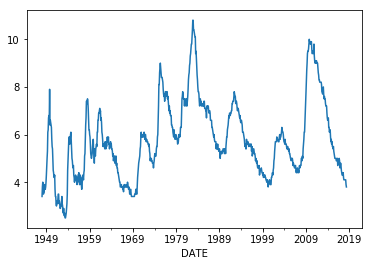

((-2.996150140489814,
  0.03525549622022327,
  12,
  832,
  {'1%': -3.4382341228740345,
   '10%': -2.568623096396542,
   '5%': -2.865020104308721},
  -423.01266301190776),
 'stationary')

In [20]:
unrate.plot()
plt.show()

result = tsa.adfuller(unrate)
# (-3.0429270526801928, 0.031075405974681617, 12, 820, [snip], -408.2036614684273)
result, adf2human(result)

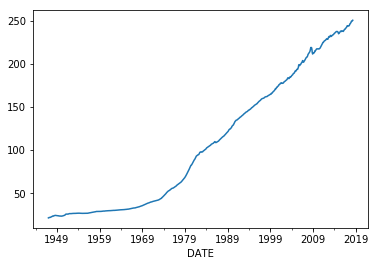

((1.932650805765383,
  0.9985787768206517,
  17,
  839,
  {'1%': -3.438168140637663,
   '10%': -2.5686076019468094,
   '5%': -2.864991017121922},
  464.71867319985654),
 'non-stationary')

In [21]:
cpi.plot()
plt.show()

result = tsa.adfuller(cpi)
# (2.1138194194179709, 0.99880376411834015, 15, 828, [snip], 442.58497014896011)

result, adf2human(result)